In [1]:
import numpy as np
import constraints
import constants as c
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
import standardmodel as sm
import darksector as ds
import pickle
from scipy import integrate

In [2]:
with open('data/T_DS_results.pkl', 'rb') as file:
    data_dict = pickle.load(file)
ms1_values = data_dict['ms1_values']
sinsq2theta_values = data_dict['sinsq2theta_values']
a_domain = data_dict['a_domain']
T_SM_domain = data_dict['T_SM_domain']

# Check the SM lifetime of $m_{s1}$

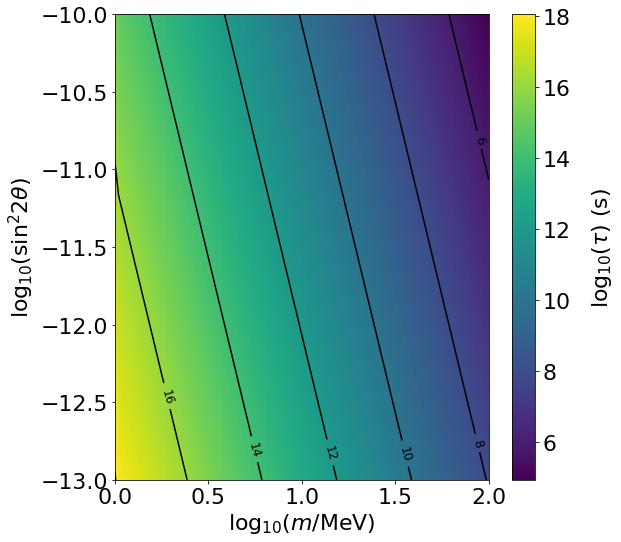

In [3]:
ms1_dense = np.logspace(np.log10(ms1_values[0]), np.log10(ms1_values[-1]), 100)
sinsq2theta_dense = np.logspace(np.log10(sinsq2theta_values[0]), np.log10(sinsq2theta_values[-1]), 90)

x, y = np.meshgrid(ms1_dense, sinsq2theta_dense)
log_lifetimes = np.log10(1/(constraints.total_decay_rate(x, np.arcsin(np.sqrt(y))/2.)*c.MeVtoHz))

plt.figure(figsize=(9,8))

# Swap x and y in imshow
im = plt.imshow(log_lifetimes, origin='lower', extent=[np.log10(x[0][0]), np.log10(x[-1][-1]), np.log10(y[0][0]), np.log10(y[-1][-1])], aspect='auto')
cb = plt.colorbar(im)
cb.set_label(r"$\log_{10}(\tau)$ (s)", labelpad=20)

# Swap x and y in contour
contours = plt.contour(np.log10(x), np.log10(y), log_lifetimes, colors='k')  # 'k' means black
plt.clabel(contours, inline=True, fontsize=12)

# Swap labels
plt.xlabel(r'$\log_{10}(m$/MeV)')
plt.ylabel(r'$\log_{10}(\sin^2 2\theta)$')

plt.tight_layout()
plt.show()

Expanded domains

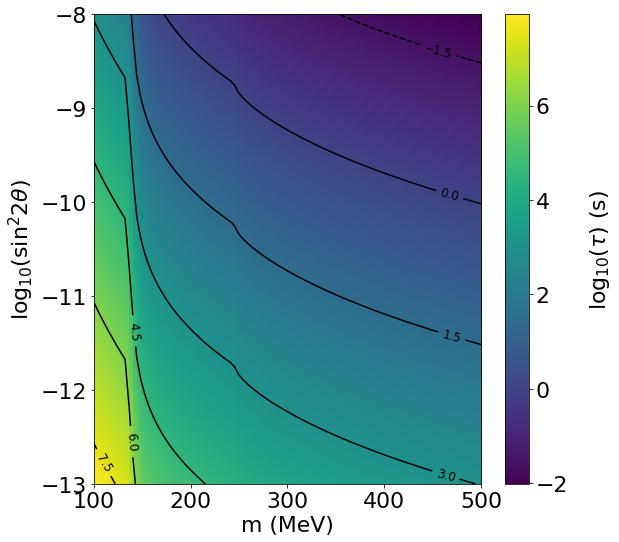

In [19]:
ms1_dense = np.linspace(100, 500, 100)
sinsq2theta_dense = np.logspace(-13, -8, 90)

x, y = np.meshgrid(ms1_dense, sinsq2theta_dense)
log_lifetimes = np.log10(1/(constraints.total_decay_rate(x, np.arcsin(np.sqrt(y))/2.)*c.MeVtoHz))

plt.figure(figsize=(9,8))

# Swap x and y in imshow
im = plt.imshow(log_lifetimes, origin='lower', extent=[x[0][0], x[-1][-1], np.log10(y[0][0]), np.log10(y[-1][-1])], aspect='auto')
cb = plt.colorbar(im)
cb.set_label(r"$\log_{10}(\tau)$ (s)", labelpad=20)

# Swap x and y in contour
contours = plt.contour(x, np.log10(y), log_lifetimes, colors='k')  # 'k' means black
plt.clabel(contours, inline=True, fontsize=12)

# Swap labels
plt.xlabel(r'm (MeV)')
plt.ylabel(r'$\log_{10}(\sin^2 2\theta)$')

plt.tight_layout()
plt.show()
